In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from typing import List, Dict, Any, Optional, Tuple
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR

## Chargez les données

In [28]:
data = pd.read_csv(r"D:\Nouveau dossier\TitreRNCP_Bloc1\projet_prevision_energies_bloc5\datasets\data.csv", 
                   parse_dates=['timestamp'], index_col='timestamp')
data.head()

BIOMASS  NUCLEAR  SOLAR  WIND_ONSHORE  \
timestamp                                                    
2017-12-31 23:00:00    295.0  37183.0    0.0        9808.0   
2018-01-01 00:00:00    293.0  34793.0    0.0        9707.0   
2018-01-01 01:00:00    293.0  34263.0    0.0        9502.0   
2018-01-01 02:00:00    294.0  34081.0    0.0        9288.0   
2018-01-01 03:00:00    294.0  34103.0    0.0        9005.0   

                     consommation_totale  production_totale  \
timestamp                                                     
2017-12-31 23:00:00              58882.0            47286.0   
2018-01-01 00:00:00              55957.0            44793.0   
2018-01-01 01:00:00              55429.0            44058.0   
2018-01-01 02:00:00              52743.0            43663.0   
2018-01-01 03:00:00              50226.0            43402.0   

                     taux_couverture_pourcent  balancing_energetique  \
timestamp                                                              
2017-12-31 23:00:00                 80.306375               -11596.0   
2018-01-01 00:00:00                 80.048966               -11164.0   
2018-01-01 01:00:00                 79.485468               -11371.0   
2018-01-01 02:00:00                 82.784445                -9080.0   
2018-01-01 03:00:00                 86.413411                -6824.0   

                     temperature  
timestamp                         
2017-12-31 23:00:00          9.3  
2018-01-01 00:00:00          9.0  
2018-01-01 01:00:00          8.9  
2018-01-01 02:00:00          8.6  
2018-01-01 03:00:00          8.1

In [29]:
data.isnull().sum()

BIOMASS                     0
NUCLEAR                     0
SOLAR                       0
WIND_ONSHORE                0
consommation_totale         0
production_totale           0
taux_couverture_pourcent    0
balancing_energetique       0
temperature                 2
dtype: int64

In [31]:
data["temperature"].fillna(value=data["temperature"].interpolate(method="linear"), inplace=True)
data.isnull().sum()

C:\Users\saida\AppData\Local\Temp\ipykernel_33992\3130371668.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





BIOMASS                     0
NUCLEAR                     0
SOLAR                       0
WIND_ONSHORE                0
consommation_totale         0
production_totale           0
taux_couverture_pourcent    0
balancing_energetique       0
temperature                 0
dtype: int64

In [32]:
data.describe()

BIOMASS        NUCLEAR         SOLAR  WIND_ONSHORE  \
count  66551.000000   66551.000000  66551.000000  66551.000000   
mean     362.295052   39327.026709   1924.243678   4207.093455   
std       80.833275    8038.412153   2912.275833   3174.589401   
min       21.000000       0.000000      0.000000      0.000000   
25%      323.000000   34714.500000      0.000000   1831.000000   
50%      344.000000   39872.000000    253.000000   3172.000000   
75%      367.000000   44083.000000   3146.000000   5771.000000   
max     1773.000000  109356.000000  30734.000000  21538.000000   

       consommation_totale  production_totale  taux_couverture_pourcent  \
count         66551.000000       66551.000000              66551.000000   
mean          51159.789996       45820.602350                 91.307086   
std           11189.566046        8775.644698                 16.151332   
min           28657.000000         317.000000                  0.607466   
25%           42797.000000       40875.000000                 81.233202   
50%           49340.000000       45813.000000                 91.881975   
75%           58486.000000       51591.000000                101.701734   
max           94912.000000      135026.000000                369.849390   

       balancing_energetique   temperature  
count           66551.000000  66551.000000  
mean            -5339.187646     13.462611  
std              8603.628150      7.153843  
min            -52900.000000     -7.000000  
25%            -10356.000000      8.300000  
50%             -4067.000000     12.900000  
75%               779.500000     18.500000  
max             84927.000000     41.700000

In [33]:
data.index.duplicated().sum()

np.int64(0)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66551 entries, 2017-12-31 23:00:00 to 2025-08-04 21:00:00
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BIOMASS                   66551 non-null  float64
 1   NUCLEAR                   66551 non-null  float64
 2   SOLAR                     66551 non-null  float64
 3   WIND_ONSHORE              66551 non-null  float64
 4   consommation_totale       66551 non-null  float64
 5   production_totale         66551 non-null  float64
 6   taux_couverture_pourcent  66551 non-null  float64
 7   balancing_energetique     66551 non-null  float64
 8   temperature               66551 non-null  float64
dtypes: float64(9)
memory usage: 7.1 MB


In [35]:
import plotly.express as px

fig = px.line(data, x=data.index, y=data.columns[2])
fig.show()

### Analyse et visualisation des données exploratoires 

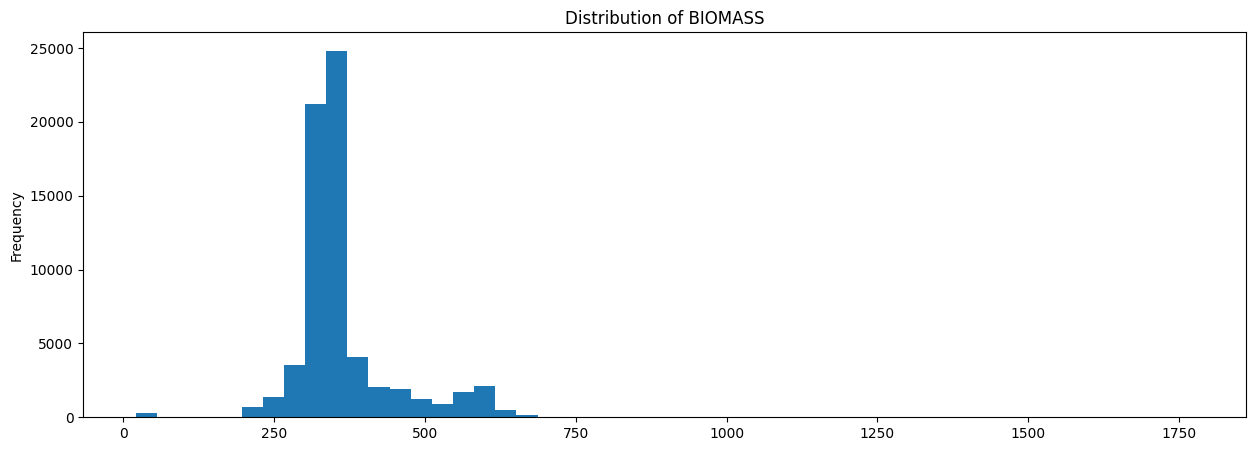

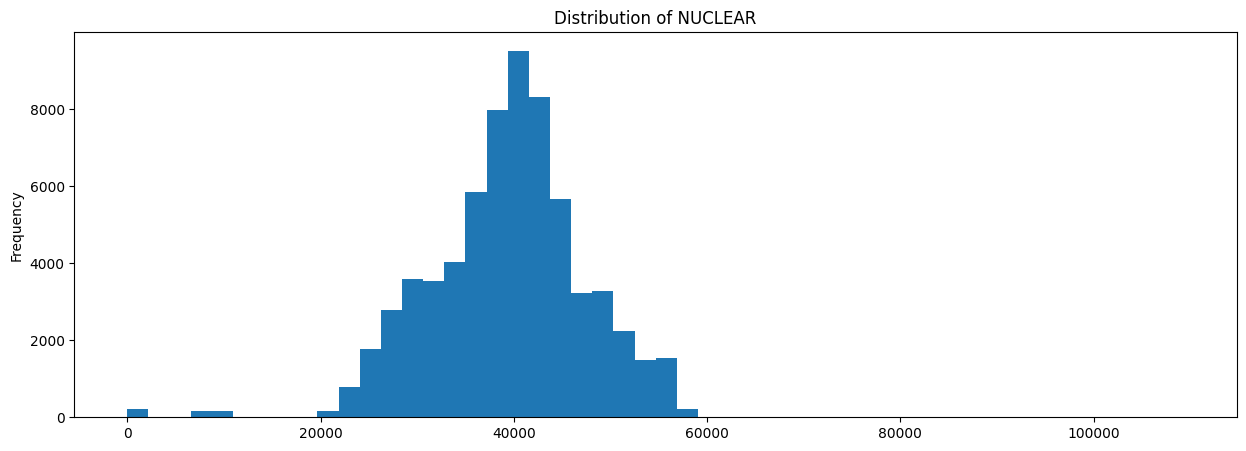

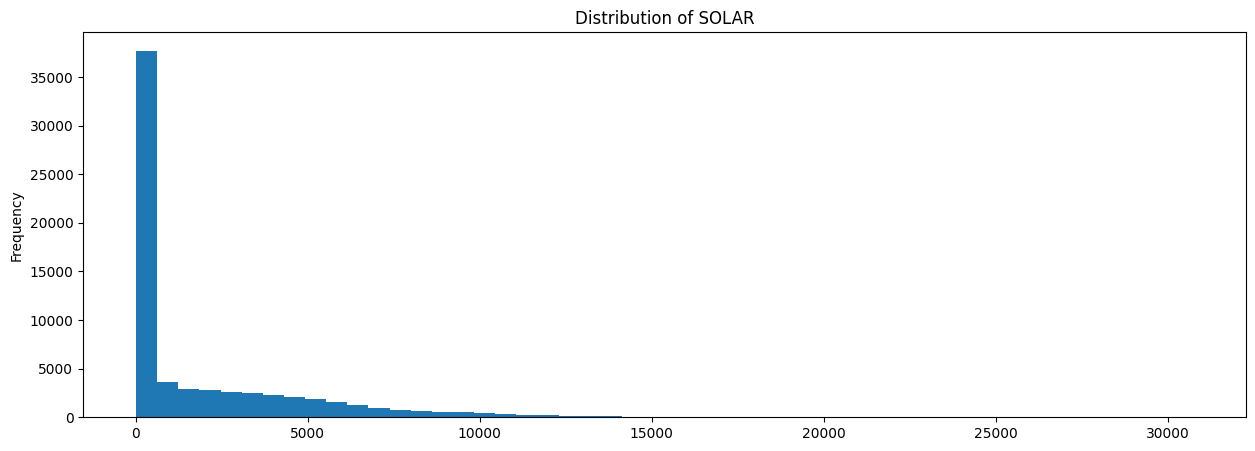

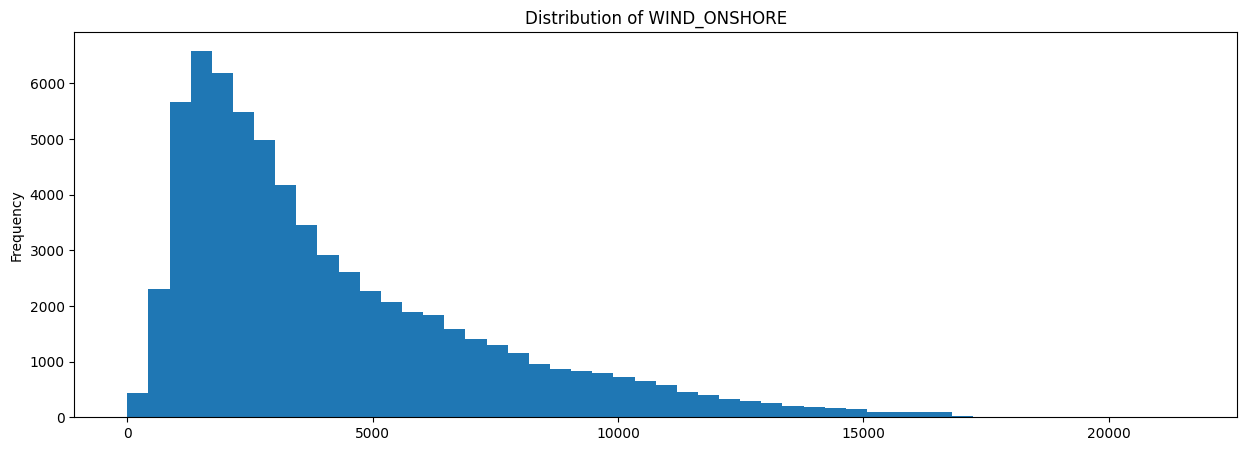

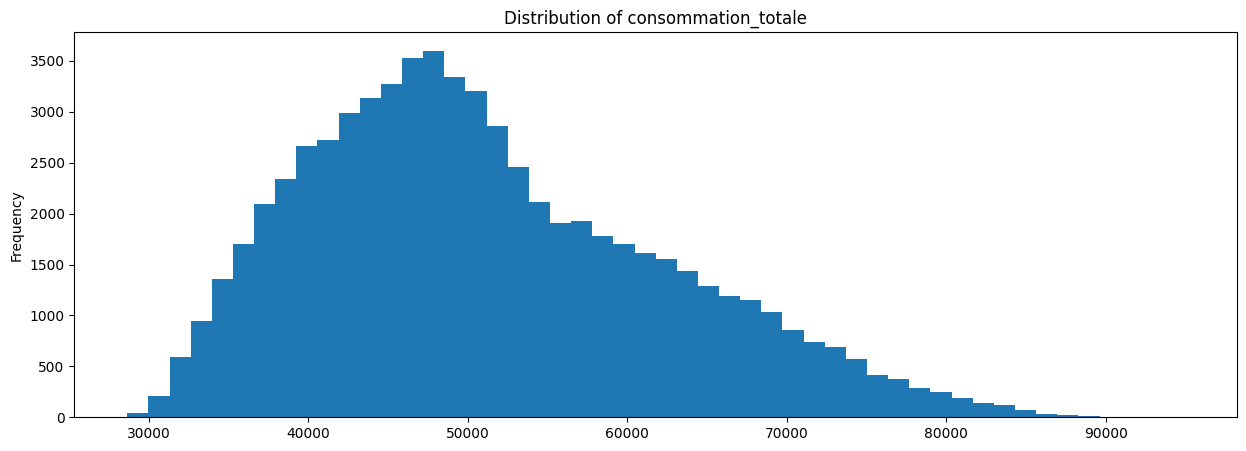

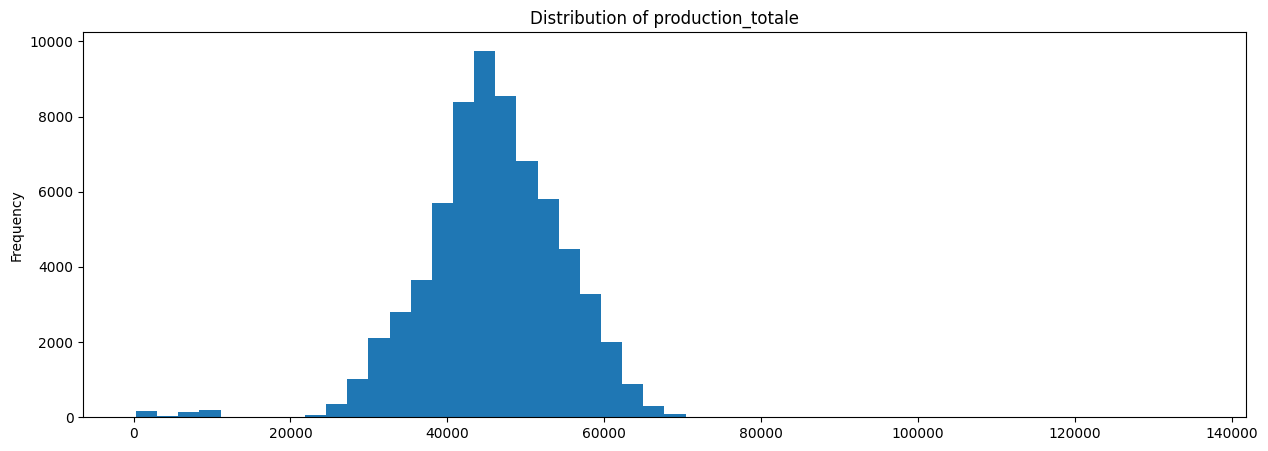

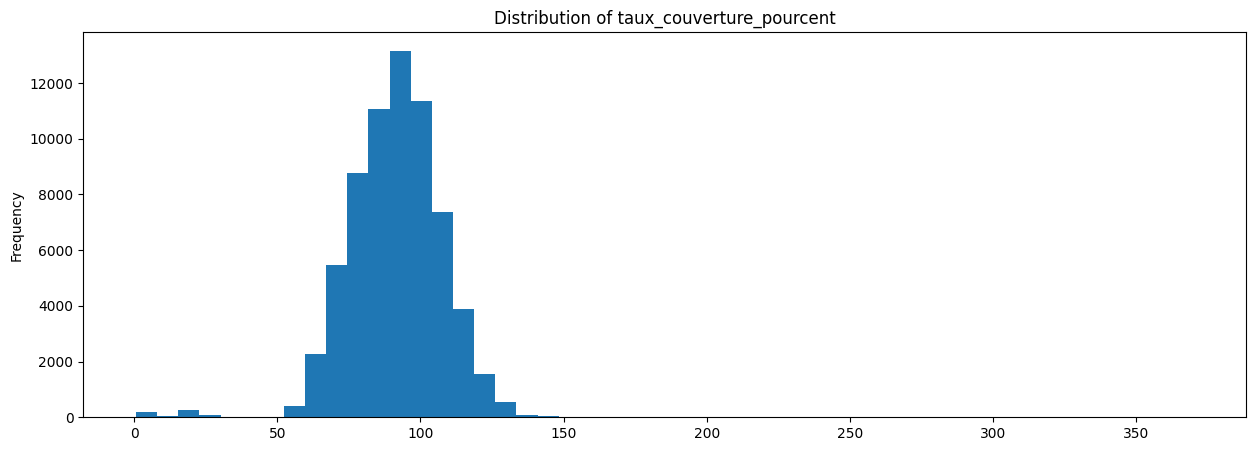

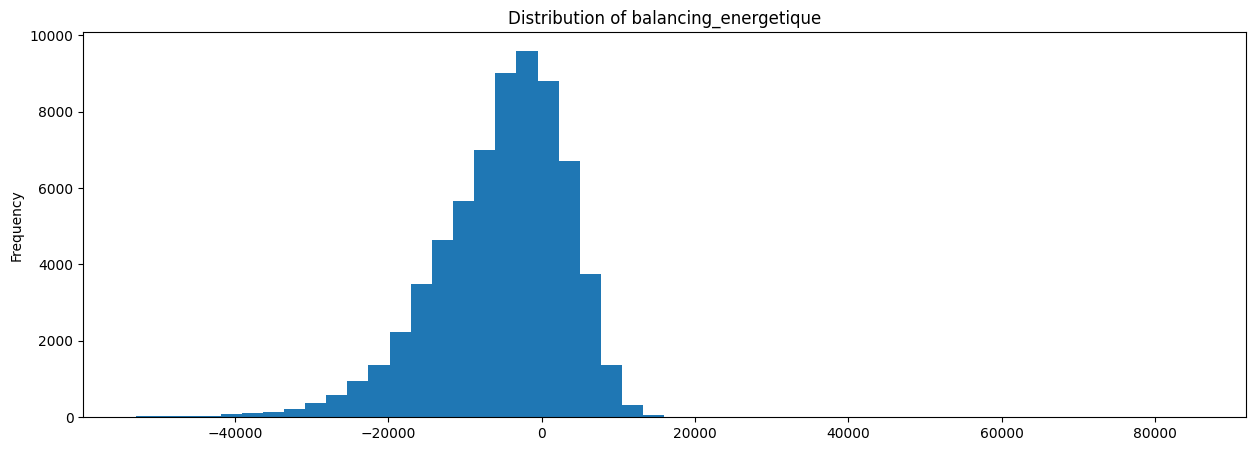

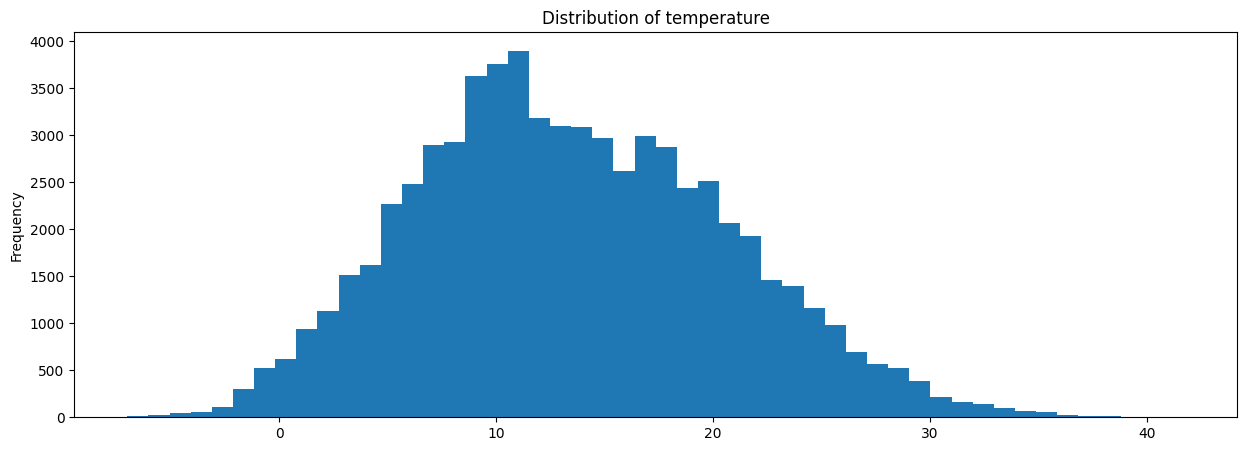

In [37]:
def distribution_data(data: pd.DataFrame):
    for col in data.columns:
        data[col].plot.hist(figsize=(15,5), bins=50, title=f'Distribution of {col}')
        plt.show()

distribution_data(data)

In [38]:
def verify_stationnarite(data: pd.DataFrame):
    result = adfuller(data)
    print(f"La serie {data.name} est stationnaire" if result[1] < 0.05 else f"La serie {data.name} n'est pas stationnaire")
    
for col in data.columns:
    verify_stationnarite(data[col])

La serie BIOMASS est stationnaire
La serie NUCLEAR est stationnaire
La serie SOLAR est stationnaire
La serie WIND_ONSHORE est stationnaire
La serie consommation_totale est stationnaire
La serie production_totale est stationnaire
La serie taux_couverture_pourcent est stationnaire
La serie balancing_energetique est stationnaire
La serie temperature est stationnaire


### Corrélation

In [39]:
import numpy as np
import plotly.graph_objects as go

df_corr = data.select_dtypes('number').corr(method="pearson")

mask_upper = np.triu(np.ones(df_corr.shape, dtype=bool), k=0)  # k=1 pour cacher aussi la diagonale

# Garder le haut, masquer le bas
z = np.where(mask_upper, df_corr.values, np.nan)    
text = np.where(mask_upper, np.round(df_corr.values, 2).astype(str), "")

fig = go.Figure(data=go.Heatmap(
    z=z,
    x=df_corr.columns,
    y=df_corr.index,
    colorscale='RdBu',
    zmin=-1, zmax=1,
    text=text,
    texttemplate='%{text}',
    hovertemplate='x: %{x}<br>y: %{y}<br>corr: %{z:.2f}<extra></extra>',
    colorbar_title='Corrélation'
))

# Pas d’inversion d’axe ici (on veut le haut)
fig.update_layout(title='Matrice de corrélation  entre les variables')
fig.show()

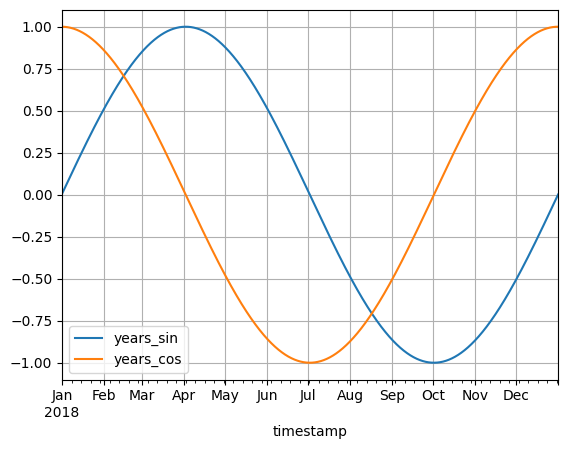

In [43]:
hour = 60*60          # 1 heure = 3600 s
day = 24*hour         # 1 jour = 86400 s
week = 7*day
month = 30.44*day     # moyenne
year = 365.2425*day   # année tropique

dataset = data.copy()
date_time = pd.to_datetime(dataset.index, format="%d/%m/%y %H:%M:%S")

# Timestamp en secondes
timestamp_s = date_time.map(pd.Timestamp.timestamp)

# Variables cycliques (sin et cos) pour chaque période

dataset["hours_sin"] = np.sin(timestamp_s * (2 * np.pi / hour))
dataset["hours_cos"] = np.cos(timestamp_s * (2 * np.pi / hour))

dataset["days_sin"] = np.sin(timestamp_s * (2 * np.pi / day))
dataset["days_cos"] = np.cos(timestamp_s * (2 * np.pi / day))

dataset["weeks_sin"] = np.sin(timestamp_s * (2 * np.pi / week))
dataset["weeks_cos"] = np.cos(timestamp_s * (2 * np.pi / week))

dataset["months_sin"] = np.sin(timestamp_s * (2 * np.pi / month))
dataset["months_cos"] = np.cos(timestamp_s * (2 * np.pi / month))

dataset["years_sin"] = np.sin(timestamp_s * (2 * np.pi / year))
dataset["years_cos"] = np.cos(timestamp_s * (2 * np.pi / year))

# Exemple de tracé pour la variable "année" entre 2018-01-01 et 2018-12-31
dataset.loc["2018-01-01":"2018-12-31", ["years_sin", "years_cos"]].plot(label=["Years sin", "Years cos"])

plt.grid()
plt.legend()
plt.show()


In [57]:
from statsmodels.tsa.stattools import ccf, grangercausalitytests

target = "consommation_totale"
features = [col for col in data.columns if (col != target) and (col != "production_totale")]

data = data.asfreq("h")
# ---------------------------
# 4. Modèle VAR
# ---------------------------
model = VAR(data.drop(columns=["production_totale", "taux_couverture_pourcent", "balancing_energetique"]))
lag_order_selection = model.select_order(maxlags=10)
print("Résultats de la sélection du nombre de lags :")
print(lag_order_selection.summary())


optimal_lags = lag_order_selection.aic

print(f"\n👉 Nombre de lags optimal retenu (AIC) : {optimal_lags}")
print("-" * 30)


# --- 3. Ajustement du modèle VAR final ---

# Ajuster le modèle avec le nombre optimal de lags
results = model.fit(optimal_lags)

# Afficher le résumé des résultats du modèle
print("Résumé des résultats du modèle VAR corrigé :")
print(results.summary())

Résultats de la sélection du nombre de lags :
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        80.07       80.07   5.937e+34       80.07
1        58.61       58.61   2.839e+25       58.61
2        56.28       56.29   2.779e+24       56.29
3        56.10       56.11   2.301e+24       56.10
4        56.03       56.05   2.154e+24       56.04
5        56.00       56.02   2.089e+24       56.01
6        55.98       56.01   2.043e+24       55.99
7        55.93       55.96   1.948e+24       55.94
8        55.89       55.93   1.871e+24       55.90
9        55.76       55.81   1.649e+24       55.78
10      55.69*      55.74*  1.540e+24*      55.71*
--------------------------------------------------

👉 Nombre de lags optimal retenu (AIC) : 10
------------------------------
Résumé des résultats du modèle VAR corrigé :
  Summary of Regression Results   
Model:                         VAR

In [44]:
import pandas as pd
import statsmodels.api as sm

features_consommation = [
    'temperature', 
    'hours_sin', 'hours_cos', 
    'days_sin', 'days_cos',
    'weeks_sin', 'weeks_cos',
    'months_sin', 'months_cos',
    'years_sin', 'years_cos'
]


def regression_multi_simple(df, target, features):
    X = df[features]
    X = sm.add_constant(X)  # Ajout de l'intercept β0
    y = df[target]
    
    model = sm.OLS(y, X).fit()
    print(f"Résultats de la régression pour {target} :")
    print(model.summary())
    print("\n\n")
    return model

model_consommation = regression_multi_simple(dataset, 'consommation_totale', features_consommation)
model_consommation.summary()

Résultats de la régression pour consommation_totale :
                             OLS Regression Results                            
Dep. Variable:     consommation_totale   R-squared:                       0.703
Model:                             OLS   Adj. R-squared:                  0.703
Method:                  Least Squares   F-statistic:                 1.573e+04
Date:                 Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                         13:37:30   Log-Likelihood:            -6.7450e+05
No. Observations:                66551   AIC:                         1.349e+06
Df Residuals:                    66540   BIC:                         1.349e+06
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     consommation_totale   R-squared:                       0.703
Model:                             OLS   Adj. R-squared:                  0.703
Method:                  Least Squares   F-statistic:                 1.573e+04
Date:                 Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                         13:37:30   Log-Likelihood:            -6.7450e+05
No. Observations:                66551   AIC:                         1.349e+06
Df Residuals:                    66540   BIC:                         1.349e+06
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature  -531.9912      6.334    -83.996      0.000    -544.405    -519.577
hours_sin   -1.174e+11   1.76e+11     -0.667      0.505   -4.62e+11    2.27e+11
hours_cos    5.834e+04     88.664    658.020      0.000    5.82e+04    5.85e+04
days_sin    -2674.0233     36.034    -74.209      0.000   -2744.649   -2603.398
days_cos    -5127.8079     35.868   -142.964      0.000   -5198.109   -5057.507
weeks_sin   -1208.7911     33.448    -36.139      0.000   -1274.350   -1143.233
weeks_cos    3095.9371     33.458     92.533      0.000    3030.360    3161.514
months_sin    408.9386     33.469     12.218      0.000     343.339     474.539
months_cos   -277.0740     33.464     -8.280      0.000    -342.662    -211.485
years_sin    1731.8669     37.450     46.244      0.000    1658.464    1805.270
years_cos    7212.5210     58.684    122.905      0.000    7097.501    7327.541
==============================================================================
Omnibus:                      641.587   Durbin-Watson:                   0.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              660.194
Skew:                           0.244   Prob(JB):                    4.37e-144
Kurtosis:                       3.003   Cond. No.                     1.14e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.2e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

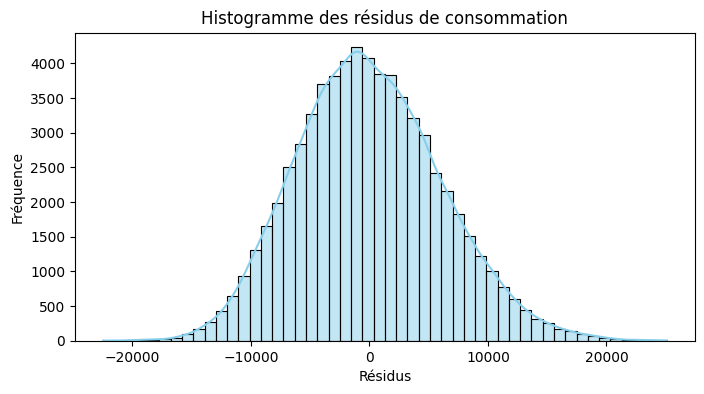

<Figure size 600x600 with 0 Axes>

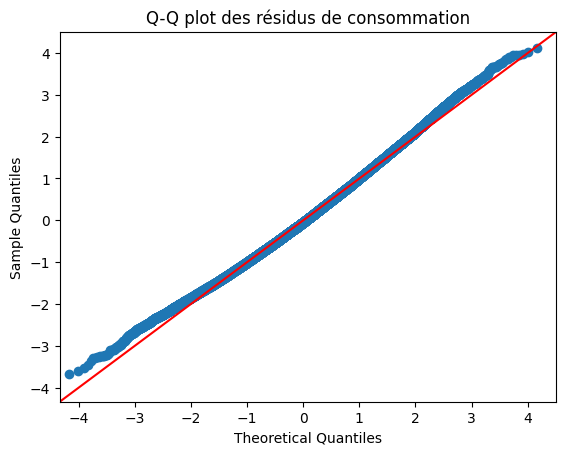

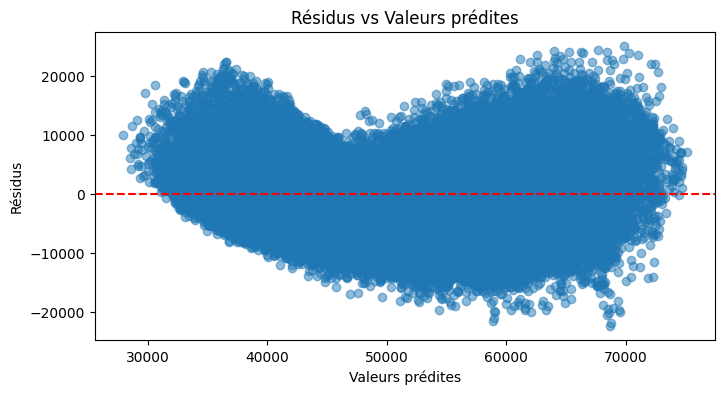

Test de Breusch-Pagan (homoscédasticité) : {'LM Stat': np.float64(2114.251211622784), 'LM p-value': np.float64(0.0), 'F-Stat': np.float64(218.32615435550284), 'F p-value': np.float64(0.0)}


<Figure size 800x400 with 0 Axes>

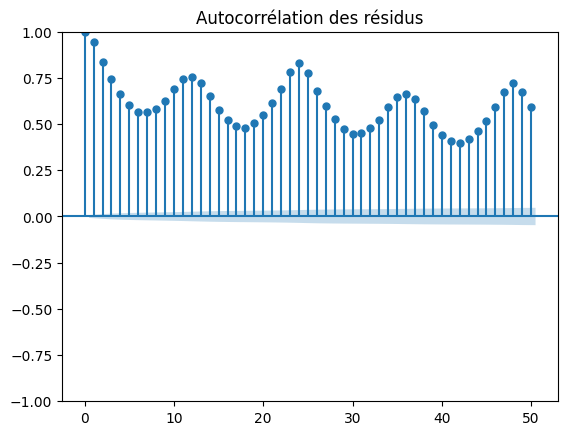

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.gofplots import qqplot

# Récupération des résidus et valeurs prédites
residus = model_consommation.resid
y_pred = model_consommation.fittedvalues

plt.figure(figsize=(8,4))
sns.histplot(residus, kde=True, bins=50, color='skyblue')
plt.title("Histogramme des résidus de consommation")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.show()

# 2️⃣ Q-Q plot des résidus
plt.figure(figsize=(6,6))
qqplot(residus, line='45', fit=True)
plt.title("Q-Q plot des résidus de consommation")
plt.show()

# 3️⃣ Graphique résidus vs valeurs prédites (homoscédasticité)
plt.figure(figsize=(8,4))
plt.scatter(y_pred, residus, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.show()

# 4️⃣ Test de Breusch-Pagan pour homoscédasticité
bp_test = het_breuschpagan(residus, model_consommation.model.exog)
labels = ['LM Stat', 'LM p-value', 'F-Stat', 'F p-value']
print("Test de Breusch-Pagan (homoscédasticité) :", dict(zip(labels, bp_test)))

# 5️⃣ Autocorrélation des résidus
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(8,4))
plot_acf(residus, lags=50)
plt.title("Autocorrélation des résidus")
plt.show()


In [29]:
production_features = [
    'temperature', 
    'hours_sin', 'hours_cos', 
    'days_sin', 'days_cos',
    'weeks_sin', 'weeks_cos',
    'months_sin', 'months_cos',
    'years_sin', 'years_cos'
]

model_production = regression_multi_simple(dataset, 'production_totale', production_features)
model_production.summary()

Résultats de la régression pour production_totale :
                            OLS Regression Results                            
Dep. Variable:      production_totale   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     5122.
Date:                Mon, 18 Aug 2025   Prob (F-statistic):               0.00
Time:                        21:20:28   Log-Likelihood:            -6.7970e+05
No. Observations:               66551   AIC:                         1.359e+06
Df Residuals:                   66540   BIC:                         1.360e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      production_totale   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     5122.
Date:                Mon, 18 Aug 2025   Prob (F-statistic):               0.00
Time:                        21:20:28   Log-Likelihood:            -6.7970e+05
No. Observations:               66551   AIC:                         1.359e+06
Df Residuals:                   66540   BIC:                         1.360e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature   -12.9241      6.849     -1.887      0.059     -26.347       0.499
hours_sin   -5.148e+10    1.9e+11     -0.271      0.787   -4.24e+11    3.21e+11
hours_cos    4.596e+04     95.874    479.349      0.000    4.58e+04    4.61e+04
days_sin      159.2002     38.964      4.086      0.000      82.831     235.570
days_cos    -2638.6530     38.785    -68.033      0.000   -2714.671   -2562.635
weeks_sin    -422.1391     36.168    -11.672      0.000    -493.029    -351.249
weeks_cos    1356.1211     36.178     37.484      0.000    1285.211    1427.031
months_sin    116.4084     36.191      3.216      0.001      45.474     187.343
months_cos   -145.2468     36.185     -4.014      0.000    -216.169     -74.325
years_sin    3082.2539     40.496     76.113      0.000    3002.882    3161.625
years_cos    6808.3031     63.456    107.292      0.000    6683.930    6932.676
==============================================================================
Omnibus:                    23432.378   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           200876.362
Skew:                          -1.455   Prob(JB):                         0.00
Kurtosis:                      10.998   Cond. No.                     1.14e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.2e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

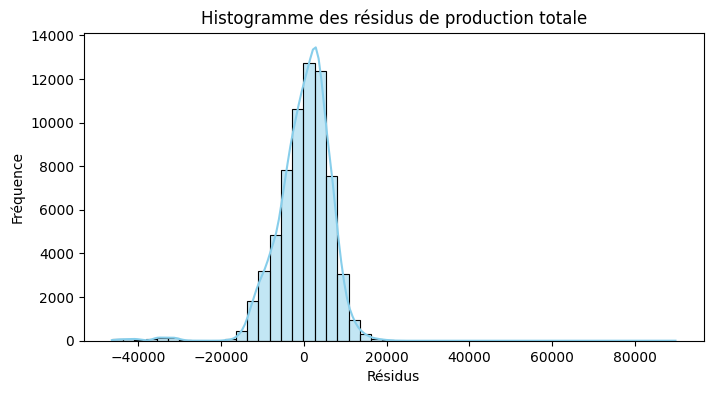

<Figure size 600x600 with 0 Axes>

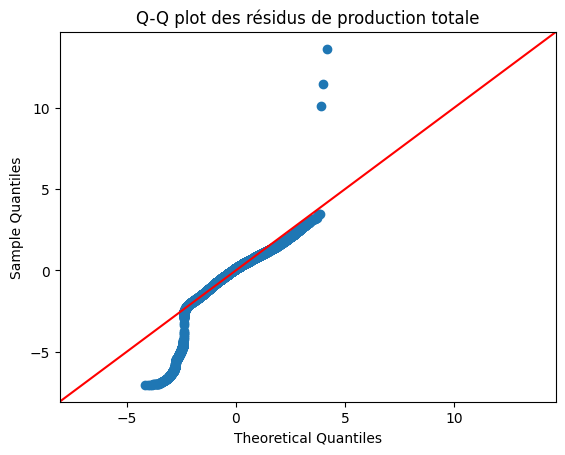

Test de Breusch-Pagan (homoscédasticité) : {'LM Stat': np.float64(1198.3148754857398), 'LM p-value': np.float64(3.327267948240362e-251), 'F-Stat': np.float64(122.00856271307424), 'F p-value': np.float64(1.5635111178164103e-253)}


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.gofplots import qqplot

# Récupération des résidus et valeurs prédites
residus1 = model_production.resid
y_pred1 = model_production.fittedvalues

plt.figure(figsize=(8,4))
sns.histplot(residus1, kde=True, bins=50, color='skyblue')
plt.title("Histogramme des résidus de production totale")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.show()

# 2️⃣ Q-Q plot des résidus
plt.figure(figsize=(6,6))
qqplot(residus1, line='45', fit=True)
plt.title("Q-Q plot des résidus de production totale")
plt.show()


#Test de Breusch-Pagan pour homoscédasticité
bp_test = het_breuschpagan(residus1, model_production.model.exog)
labels = ['LM Stat', 'LM p-value', 'F-Stat', 'F p-value']
print("Test de Breusch-Pagan (homoscédasticité) :", dict(zip(labels, bp_test)))



In [94]:
features = [
    'temperature', 
    'hours_sin', 'hours_cos', 
    'days_sin', 'days_cos',
    'weeks_sin', 'weeks_cos',
    'months_sin', 'months_cos',
    'years_sin', 'years_cos'
]

model_solaire = regression_multi_simple(dataset, 'SOLAR', features)
model_solaire.summary()


Résultats de la régression pour SOLAR :
                            OLS Regression Results                            
Dep. Variable:                  SOLAR   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     9511.
Date:                Sun, 10 Aug 2025   Prob (F-statistic):               0.00
Time:                        15:32:18   Log-Likelihood:            -5.9575e+05
No. Observations:               66551   AIC:                         1.192e+06
Df Residuals:                   66540   BIC:                         1.192e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperatur

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SOLAR   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     9511.
Date:                Sun, 10 Aug 2025   Prob (F-statistic):               0.00
Time:                        15:32:18   Log-Likelihood:            -5.9575e+05
No. Observations:               66551   AIC:                         1.192e+06
Df Residuals:                   66540   BIC:                         1.192e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature    61.8321      1.940     31.875      0.000      58.030      65.634
hours_sin    5.795e+10   5.39e+10      1.075      0.282   -4.77e+10    1.64e+11
hours_cos    1069.3253     27.156     39.378      0.000    1016.100    1122.550
days_sin      840.9819     11.036     76.202      0.000     819.351     862.613
days_cos    -2708.9451     10.985   -246.593      0.000   -2730.477   -2687.414
weeks_sin      -2.6643     10.244     -0.260      0.795     -22.743      17.415
weeks_cos      24.7638     10.247      2.417      0.016       4.679      44.848
months_sin     21.5285     10.251      2.100      0.036       1.437      41.620
months_cos     -2.9293     10.249     -0.286      0.775     -23.018      17.159
years_sin     349.3570     11.470     30.458      0.000     326.876     371.838
years_cos    -661.3580     17.973    -36.796      0.000    -696.586    -626.130
==============================================================================
Omnibus:                    25286.639   Durbin-Watson:                   0.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           132779.415
Skew:                           1.769   Prob(JB):                         0.00
Kurtosis:                       8.947   Cond. No.                     1.14e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.2e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [95]:
model_eolien = regression_multi_simple(dataset, 'WIND_ONSHORE', features)
model_eolien.summary()

Résultats de la régression pour WIND_ONSHORE :
                            OLS Regression Results                            
Dep. Variable:           WIND_ONSHORE   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     1300.
Date:                Sun, 10 Aug 2025   Prob (F-statistic):               0.00
Time:                        15:33:15   Log-Likelihood:            -6.2509e+05
No. Observations:               66551   AIC:                         1.250e+06
Df Residuals:                   66540   BIC:                         1.250e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
tem

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           WIND_ONSHORE   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     1300.
Date:                Sun, 10 Aug 2025   Prob (F-statistic):               0.00
Time:                        15:33:15   Log-Likelihood:            -6.2509e+05
No. Observations:               66551   AIC:                         1.250e+06
Df Residuals:                   66540   BIC:                         1.250e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature    83.1802      3.015     27.593      0.000      77.272      89.089
hours_sin    4.241e+10   8.37e+10      0.506      0.613   -1.22e+11    2.07e+11
hours_cos    3087.2361     42.201     73.155      0.000    3004.521    3169.951
days_sin      -69.1875     17.151     -4.034      0.000    -102.804     -35.571
days_cos      302.3367     17.072     17.709      0.000     268.875     335.798
weeks_sin      14.9586     15.920      0.940      0.347     -16.246      46.163
weeks_cos    -107.4856     15.925     -6.750      0.000    -138.698     -76.273
months_sin   -139.1050     15.931     -8.732      0.000    -170.329    -107.881
months_cos    175.7636     15.928     11.035      0.000     144.545     206.982
years_sin     664.6924     17.825     37.289      0.000     629.755     699.630
years_cos    2288.5934     27.932     81.935      0.000    2233.847    2343.340
==============================================================================
Omnibus:                     9307.422   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14145.681
Skew:                           1.012   Prob(JB):                         0.00
Kurtosis:                       4.001   Cond. No.                     1.14e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.2e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [96]:

model_nucleaire = regression_multi_simple(dataset, 'NUCLEAR', features)
model_nucleaire.summary()

Résultats de la régression pour NUCLEAR :
                            OLS Regression Results                            
Dep. Variable:                NUCLEAR   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     4276.
Date:                Sun, 10 Aug 2025   Prob (F-statistic):               0.00
Time:                        15:33:28   Log-Likelihood:            -6.7634e+05
No. Observations:               66551   AIC:                         1.353e+06
Df Residuals:                   66540   BIC:                         1.353e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperat

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                NUCLEAR   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     4276.
Date:                Sun, 10 Aug 2025   Prob (F-statistic):               0.00
Time:                        15:33:28   Log-Likelihood:            -6.7634e+05
No. Observations:               66551   AIC:                         1.353e+06
Df Residuals:                   66540   BIC:                         1.353e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature  -157.1602      6.512    -24.136      0.000    -169.923    -144.398
hours_sin    -1.52e+11   1.81e+11     -0.841      0.401   -5.07e+11    2.02e+11
hours_cos    4.143e+04     91.156    454.476      0.000    4.12e+04    4.16e+04
days_sin     -610.9454     37.046    -16.491      0.000    -683.556    -538.334
days_cos     -230.8349     36.876     -6.260      0.000    -303.112    -158.558
weeks_sin    -433.1034     34.388    -12.594      0.000    -500.505    -365.702
weeks_cos    1439.8422     34.398     41.858      0.000    1372.422    1507.262
months_sin    235.8700     34.410      6.855      0.000     168.426     303.314
months_cos   -314.4694     34.404     -9.140      0.000    -381.901    -247.037
years_sin    2061.8335     38.503     53.550      0.000    1986.368    2137.299
years_cos    5184.9659     60.333     85.939      0.000    5066.713    5303.219
==============================================================================
Omnibus:                    18569.633   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            93419.429
Skew:                          -1.264   Prob(JB):                         0.00
Kurtosis:                       8.225   Cond. No.                     1.14e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.2e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
dataset_mean = dataset.resample('D').mean()
dataset_mean.shape, 

(2774, 9)

In [28]:
from statsmodels.tsa.seasonal import STL


def decompose_series(series, period):
    stl = STL(series, period=period)
    result = stl.fit()
    return result

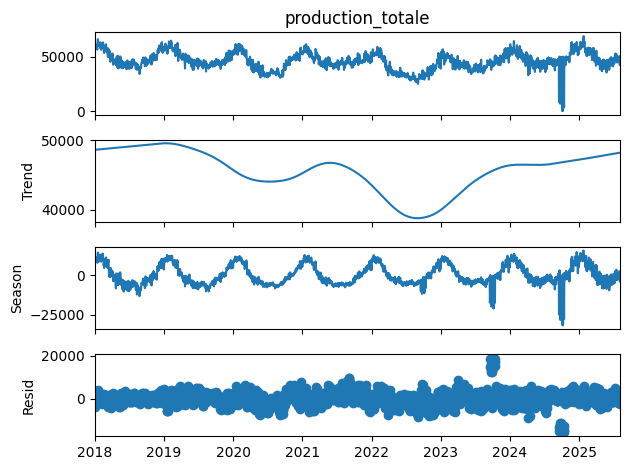

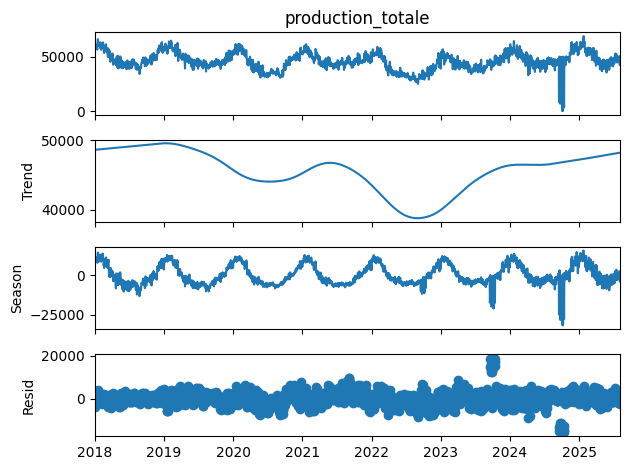

In [34]:
results = decompose_series(dataset_mean['production_totale'], 365)
results.plot()

In [35]:
results1 = decompose_series(dataset_mean['consommation_totale'], 365)

<Axes: xlabel='timestamp'>

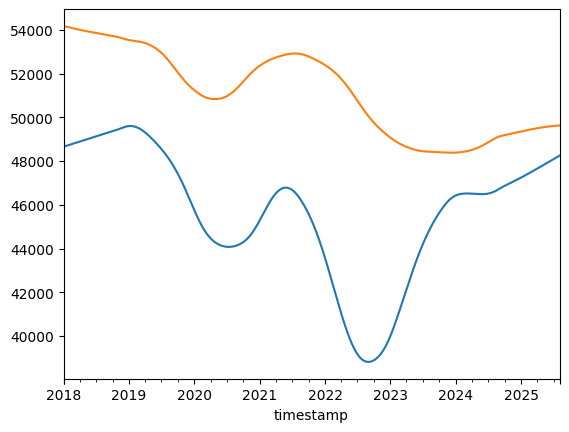

In [ ]:
# Afficher les deux décompositions production_totale et consommation_totale
results.trend.plot()
results1.trend.plot()

In [ ]:
# Relancer les tests bidirectionnels avec contrôles saisonniers (Fourier)
conf = []  # pas d'autres confondants explicites

pairs = [
    ("temperature", "production_totale"),
    ("temperature", "consommation_totale"),
    ("temperature", "SOLAR"),
    ("temperature", "WIND_ONSHORE"),
    ("temperature", "NUCLEAR"),
]

for a, b in pairs:
    if a in df_full.columns and b in df_full.columns:
        try:
            _ = var_causality_bidir_with_seasonality(
                df_full, var_a=a, var_b=b, confounders=conf,
                K_daily=3, K_weekly=1, K_yearly=2, maxlags=14, difference=True
            )
        except Exception as e:
            print(f"Erreur tests (saisonnalité) {a}<->{b} :", e)
    else:
        print(f"Colonnes absentes pour {a}<->{b} (saisonnalité). Présentes: {a in df_full.columns}, {b in df_full.columns}")



=== Tests bidirectionnels (avec contrôles saisonniers) entre temperature et production_totale ===
temperature -> production_totale: OUI (p=0.0000, lag=2, diff=0, n=66551)
production_totale -> temperature: OUI (p=0.0000, lag=2, diff=0, n=66551)

=== Tests bidirectionnels (avec contrôles saisonniers) entre temperature et consommation_totale ===
temperature -> consommation_totale: OUI (p=0.0000, lag=1, diff=0, n=66551)
consommation_totale -> temperature: NON (p=0.1398, lag=1, diff=0, n=66551)

=== Tests bidirectionnels (avec contrôles saisonniers) entre temperature et SOLAR ===
temperature -> SOLAR: OUI (p=0.0000, lag=3, diff=0, n=66551)
SOLAR -> temperature: OUI (p=0.0000, lag=3, diff=0, n=66551)

=== Tests bidirectionnels (avec contrôles saisonniers) entre temperature et WIND_ONSHORE ===
temperature -> WIND_ONSHORE: OUI (p=0.0000, lag=3, diff=0, n=66551)
WIND_ONSHORE -> temperature: OUI (p=0.0000, lag=3, diff=0, n=66551)

=== Tests bidirectionnels (avec contrôles saisonniers) entre tem